(model-comparison-notebook)=
# CFA: confronto tra modelli 

In [1]:
source("../_common.R")

In un modello CFA, i parametri  possono essere stimati senza vincoli, possono essere fissi o possono essre stimati sulla base di alcuni vincoli. Un parametro libero è sconosciuto e il ricercatore consente all'algoritmo di stima di trovare il suo valore ottimale che, insime agli altri parametri del modello, riduce al minimo le differenze tra le matrici di varianze-covarianze osservate e quelle predette dal modello. Un parametro fisso è pre-specificato dal ricercatore ad un valore specifico, più comunemente 1.0 (ad esempio, per definire la metrica di una variabile latente) o 0 (ad esempio, l'assenza di saturazionoi fattoriali o di covarianze di errore). Come per un parametro libero, anche un parametro vincolato è sconosciuto; tuttavia, un tale parametro non può assumere un valore qualsiasi, ma deve rispettare le restrizioni su suoi valori che il ricercatore ha imposto. I vincoli più comuni sono i vincoli di uguaglianza, in cui i parametri non standardizzati devono assumere valori uguali (ad esempio, in diversi gruppi).

Consideriamo un esempio discusso da {cite:t}`brown2015confirmatory`. Viene qui esaminato un set di dati in cui le prime tre misure osservate (X1, X2, X3) sono indicatori di un costrutto latente corrispondente alla Memoria uditiva e il secondo insieme di misure (X4, X5, X6) sono indicatori di un altro costrutto latente, Memoria visiva. Le tre misure usate quali indicatori del costrutto di memoria uditiva sono: X1 = memoria logica, X2 = associazione verbale a coppie, X3 = liste di parole; le tre misure usate come indicatori del costrutto di memoria visiva sono: X4 = immagini di facce, X5 = foto di famiglia, X6 = generiche riproduzioni visive. I dati sono i seguenti:

In [2]:
sds <- '2.610  2.660  2.590  1.940  2.030  2.050'

cors <-'
  1.000
  0.661  1.000
  0.630  0.643  1.000
  0.270  0.300  0.268  1.000
  0.297  0.265  0.225  0.805  1.000
  0.290  0.287  0.248  0.796  0.779  1.000'

covs <- getCov(cors, sds = sds, names = paste("x", 1:6, sep = ""))
print(covs)

         x1       x2       x3       x4       x5       x6
x1 6.812100 4.589059 4.258737 1.367118 1.573595 1.551645
x2 4.589059 7.075600 4.429884 1.548120 1.430947 1.565011
x3 4.258737 4.429884 6.708100 1.346593 1.182982 1.316756
x4 1.367118 1.548120 1.346593 3.763600 3.170251 3.165692
x5 1.573595 1.430947 1.182982 3.170251 4.120900 3.241808
x6 1.551645 1.565011 1.316756 3.165692 3.241808 4.202500


Adattiamo i cinque modelli discussi da {cite:t}`brown2015confirmatory`.

## Modello congenerico 

In [3]:
model.congeneric <- '
  auditorymemory =~ x1 + x2 + x3
  visualmemory   =~ x4 + x5 + x6
'

In [4]:
fit.congeneric <- cfa(
  model.congeneric, 
  sample.cov = covs, 
  sample.nobs = 200, 
  std.lv = TRUE
)

L'output si ottiene con:

In [5]:
out = summary(
  fit.congeneric, 
  fit.measures = TRUE, 
  standardized = TRUE, 
  rsquare = TRUE
)
print(out)

lavaan 0.6.17 ended normally after 21 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13

  Number of observations                           200

Model Test User Model:
                                                      
  Test statistic                                 4.877
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.771

Model Test Baseline Model:

  Test statistic                               719.515
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.008

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2337.980
  Loglikelihood unrestricted model (H1)      -23

Il diagramma di percorso del modello è il seguente.

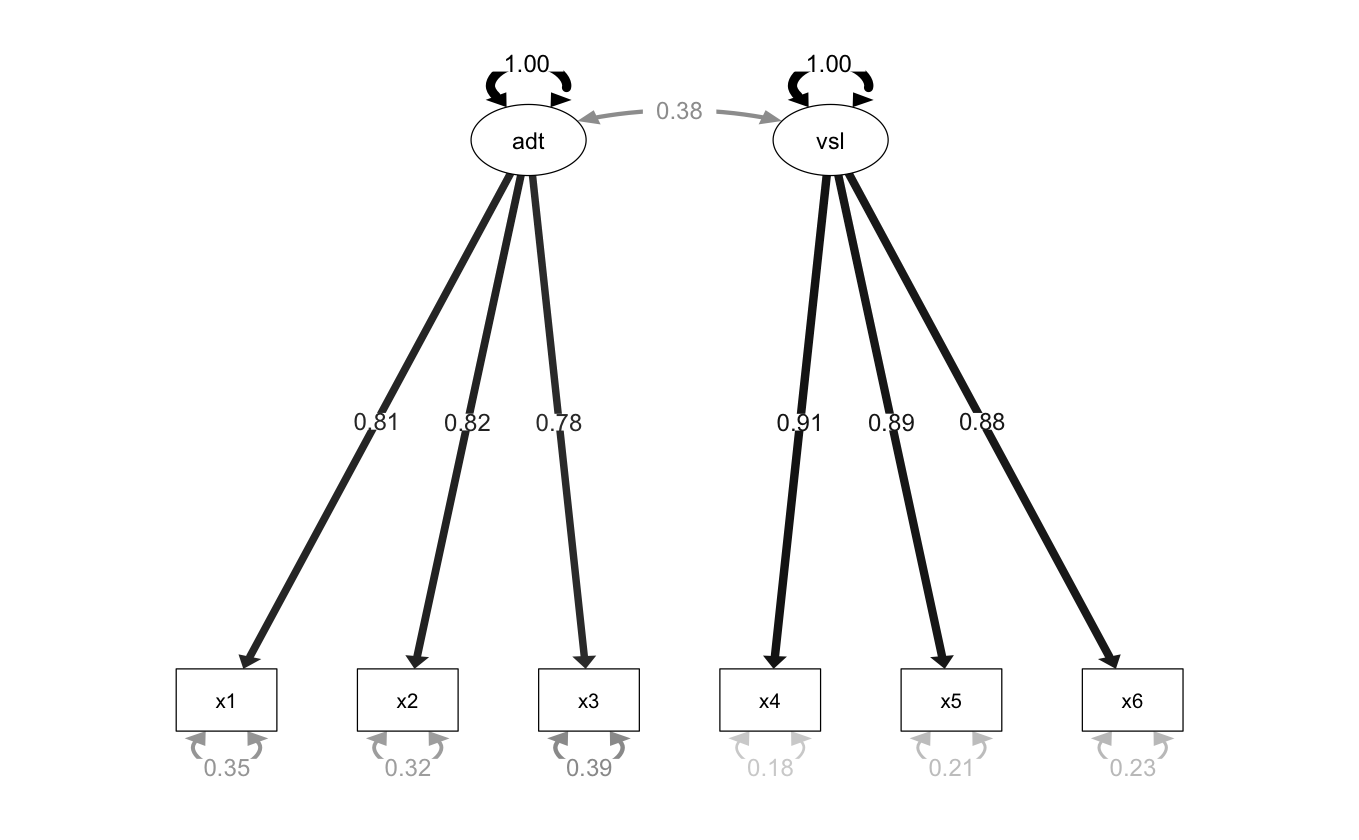

In [6]:
semPaths(
  fit.congeneric,
  "std",
  posCol = c("black"),
  edge.label.cex = 1.2,
  sizeMan = 7
)

## Modello tau-equivalente

Solo memoria auditiva:

In [7]:
model.tau.a <- '
  auditorymemory =~ x1 + v1*x1 + v1*x2 + v1*x3
  visualmemory   =~ x4 + x5 + x6
'

In [8]:
fit.tau.a <- cfa(
  model.tau.a, 
  sample.cov = covs, 
  sample.nobs = 200, 
  std.lv = TRUE
)

Memoria auditiva e visiva:

In [9]:
model.tau.av <- '
  auditorymemory =~ x1 + v1*x1 + v1*x2 + v1*x3
  visualmemory   =~ x4 + v2*x4 + v2*x5 + v2*x6
'

In [10]:
fit.tau.av <- cfa(
  model.tau.av, 
  sample.cov = covs, 
  sample.nobs = 200, 
  std.lv = TRUE
)

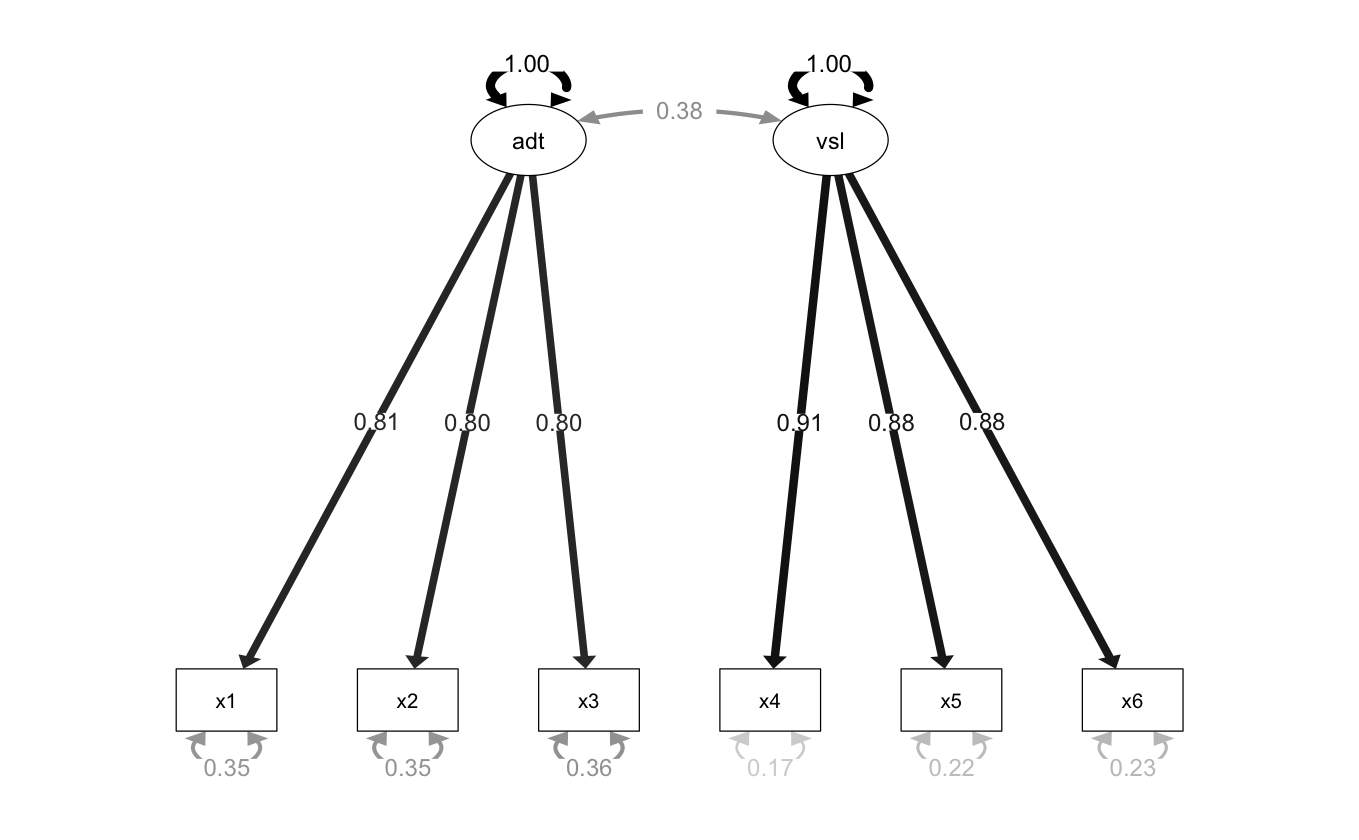

In [11]:
semPaths(
  fit.tau.av,
  "std",
  posCol = c("black"),
  edge.label.cex = 1.2,
  sizeMan = 7
)

## Modello parallelo

Solo memoria auditiva:

In [12]:
model.parallel.a <- '
  auditorymemory =~ x1 + v1*x1 + v1*x2 + v1*x3
  visualmemory   =~ x4 + v2*x4 + v2*x5 + v2*x6
  x1 ~~ v3 * x1
  x2 ~~ v3 * x2
  x3 ~~ v3 * x3
'

In [13]:
fit.parallel.a <- cfa(
  model.parallel.a, 
  sample.cov = covs, 
  sample.nobs = 200, 
  std.lv = TRUE
)

Memoria auditiva e visiva:

In [14]:
model.parallel.av <- '
  auditorymemory =~ x1 + v1*x1 + v1*x2 + v1*x3
  visualmemory   =~ x4 + v2*x4 + v2*x5 + v2*x6
  x1 ~~ v3 * x1
  x2 ~~ v3 * x2
  x3 ~~ v3 * x3
 
  x4 ~~ v4 * x4
  x5 ~~ v4 * x5
  x6 ~~ v4 * x6
'

In [15]:
fit.parallel.av <- cfa(
  model.parallel.av, 
  sample.cov = covs, 
  sample.nobs = 200, 
  std.lv = TRUE
)

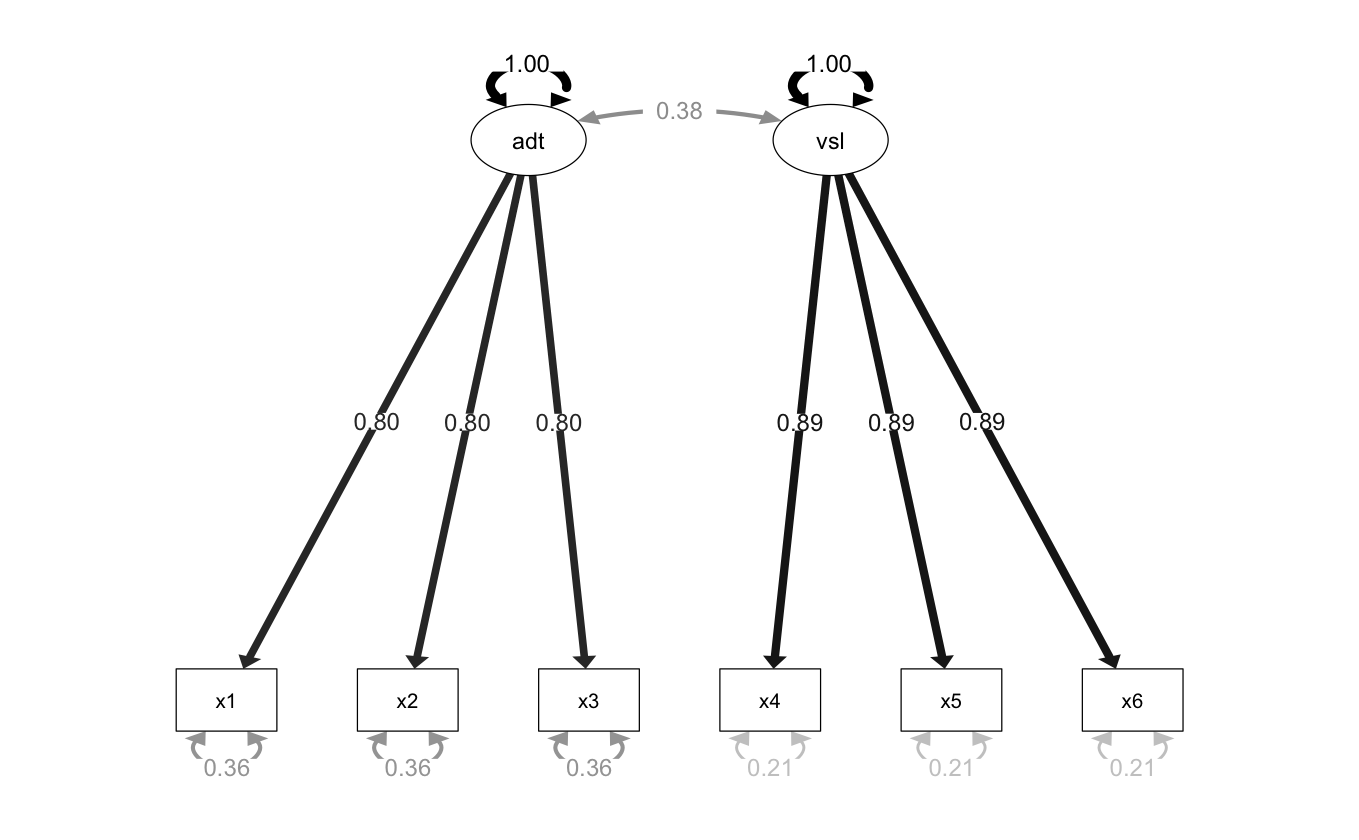

In [16]:
semPaths(
  fit.parallel.av,
  "std",
  posCol = c("black"),
  edge.label.cex = 1.2,
  sizeMan = 7
)

## Il test del $\chi^2$

Il confronto tra modelli nidificati procede attraverso il test $\chi^2$. Tale test si basa su una proprietà delle variabili casuali distribuite come $\chi^2$: la differenza tra due v.c. $X_1$ e $X_2$ che seguono la distribuzione $\chi^2$, rispettivamente con $\nu_1$ e $\nu_2$, con $\nu_1 > \nu_2$, è una variabile causale che segue la distribuzione $\chi^2$ con gradi di libertà pari a $\nu_1 - \nu_2$.

Un modello nidificato è un modello che impone dei vincoli sui parametri del modello di partenza. L'imposizione di vincoli sui parametri ha la conseguenza che vi sarà un numero minore di parametri da stimare. Il confronto tra i modelli si esegue valutando in maniera relativa la bontà di adattamento di ciascun modello per mezzo della statistica chi-quadrato. La statistica così calcolata avrà un numero di gradi di libertà uguale alla differenza tra i gradi di libertà dei due modelli. 

Nel caso dell'esempio in dicussione, abbiamo

In [17]:
out = anova(
  fit.congeneric, 
  fit.tau.a, 
  fit.tau.av, 
  fit.parallel.a, 
  fit.parallel.av, 
  test = "chisq"
)
print(out)


Chi-Squared Difference Test

                Df    AIC    BIC  Chisq Chisq diff    RMSEA Df diff Pr(>Chisq)
fit.congeneric   8 4702.0 4744.8 4.8773                                       
fit.tau.a       10 4698.7 4735.0 5.6597     0.7823 0.000000       2     0.6763
fit.tau.av      12 4695.0 4724.6 5.8810     0.2213 0.000000       2     0.8952
fit.parallel.a  14 4691.1 4714.1 5.9769     0.0959 0.000000       2     0.9532
fit.parallel.av 16 4690.4 4706.9 9.2772     3.3003 0.057016       2     0.1920


I test precedenti indicano come non vi sia una perdita di adattamento passando dal modello congenerico al modello più restrittivo (ovvero, il modello parallelo per entrambi i fattori). Per questi dati, dunque, può essere adottato il modello più semplice, cioè il modello parallelo.

